In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import requests as r
from bs4 import BeautifulSoup

In [2]:
url = 'https://www.worldometers.info/gdp/gdp-by-country/'

In [3]:
r = r.get(url)
r

<Response [200]>

In [4]:
tables = pd.read_html(url)
df = tables [0]
print(df)

       #           Country GDP  (nominal, 2023)    GDP  (abbrev.) GDP growth  \
0      1     United States  $27,720,700,000,000  $27.721 trillion      2.89%   
1      2             China  $17,794,800,000,000  $17.795 trillion      5.25%   
2      3           Germany   $4,525,700,000,000   $4.526 trillion     -0.27%   
3      4             Japan   $4,204,490,000,000   $4.204 trillion      1.68%   
4      5             India   $3,567,550,000,000   $3.568 trillion      8.15%   
..   ...               ...                  ...               ...        ...   
176  177        Micronesia         $460,000,000      $460 million      0.78%   
177  178             Palau         $281,849,063      $282 million      1.88%   
178  179          Kiribati         $279,208,903      $279 million      4.12%   
179  180  Marshall Islands         $259,300,000      $259 million     -3.93%   
180  181            Tuvalu          $62,280,312       $62 million      3.85%   

     Population  (2023) GDP per capita 

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   #                     181 non-null    int64 
 1   Country               181 non-null    object
 2   GDP  (nominal, 2023)  181 non-null    object
 3   GDP  (abbrev.)        181 non-null    object
 4   GDP growth            181 non-null    object
 5   Population  (2023)    181 non-null    int64 
 6   GDP per capita        181 non-null    object
 7   Share of  World GDP   181 non-null    object
dtypes: int64(2), object(6)
memory usage: 11.4+ KB


In [5]:
print([repr(col) for col in df.columns])

["'#'", "'Country'", "'GDP  (nominal, 2023)'", "'GDP  (abbrev.)'", "'GDP growth'", "'Population  (2023)'", "'GDP per capita'", "'Share of  World GDP'"]


In [6]:
for col in df.columns:
    if "GDP" in col:
        print(f"Possible match: '{col}'")

Possible match: 'GDP  (nominal, 2023)'
Possible match: 'GDP  (abbrev.)'
Possible match: 'GDP growth'
Possible match: 'GDP per capita'
Possible match: 'Share of  World GDP'


In [7]:
df.columns = df.columns.str.strip().str.replace(r"\s+", " ", regex=True)  # Remove extra spaces
df.rename(columns={df.columns[df.columns.str.contains("GDP", case=False)][0]: "GDP 2023"}, inplace=True)  # Rename first matching GDP column to "GDP"

In [8]:
print(df["GDP 2023"].head())

0    $27,720,700,000,000
1    $17,794,800,000,000
2     $4,525,700,000,000
3     $4,204,490,000,000
4     $3,567,550,000,000
Name: GDP 2023, dtype: object


In [ ]:
#Top ten countries 

In [16]:
print(df[["Country", "GDP 2023"]].head(10))

          Country             GDP 2023
0   United States  $27,720,700,000,000
1           China  $17,794,800,000,000
2         Germany   $4,525,700,000,000
3           Japan   $4,204,490,000,000
4           India   $3,567,550,000,000
5  United Kingdom   $3,380,850,000,000
6          France   $3,051,830,000,000
7           Italy   $2,300,940,000,000
8          Brazil   $2,173,670,000,000
9          Canada   $2,142,470,000,000


In [17]:
df["GDP 2023"] = (
    df["GDP 2023"]
    .astype(str)  # Ensure all values are strings
    .str.replace(r"[^0-9.]", "", regex=True)  # Remove non-numeric characters
    .astype(float)  # Convert to float
)

In [20]:
print(df.dtypes)

#                       int64
Country                object
GDP 2023              float64
GDP (abbrev.)          object
GDP growth             object
Population (2023)       int64
GDP per capita         object
Share of World GDP     object
dtype: object


In [21]:
df_top10 = df.sort_values(by="GDP 2023", ascending=False).head(10)
print(df_top10.loc[:, ["Country", "GDP 2023"]])

          Country      GDP 2023
0   United States  2.772070e+13
1           China  1.779480e+13
2         Germany  4.525700e+12
3           Japan  4.204490e+12
4           India  3.567550e+12
5  United Kingdom  3.380850e+12
6          France  3.051830e+12
7           Italy  2.300940e+12
8          Brazil  2.173670e+12
9          Canada  2.142470e+12


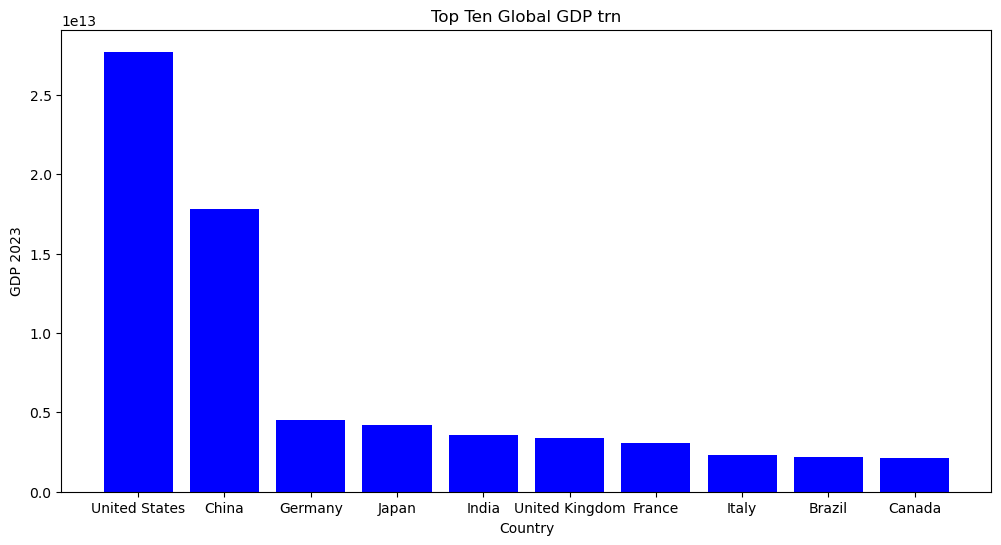

In [35]:
df_top10 = df.sort_values(by="GDP 2023", ascending=False).head(10)
plt.figure(figsize=(12,6))
plt.bar(df_top10['Country'], df_top10['GDP 2023'], color='blue')
plt.xlabel('Country')
plt.ylabel('GDP 2023')
plt.title('Top Ten Global GDP trn')
plt.show()

In [43]:
df["GDP 2023"] = df["GDP 2023"].astype(str).str.replace(r"[^0-9.]", "", regex=True).astype(float)
df["GDP per capita"] = df["GDP per capita"].astype(str).str.replace(r"[^0-9.]", "", regex=True).astype(float)

In [44]:
df_top10_gdp_per_capita = df.sort_values(by="GDP per capita", ascending=False).head(10)

In [45]:
df_top10_gdp = df.sort_values(by="GDP 2023", ascending=False).head(10)

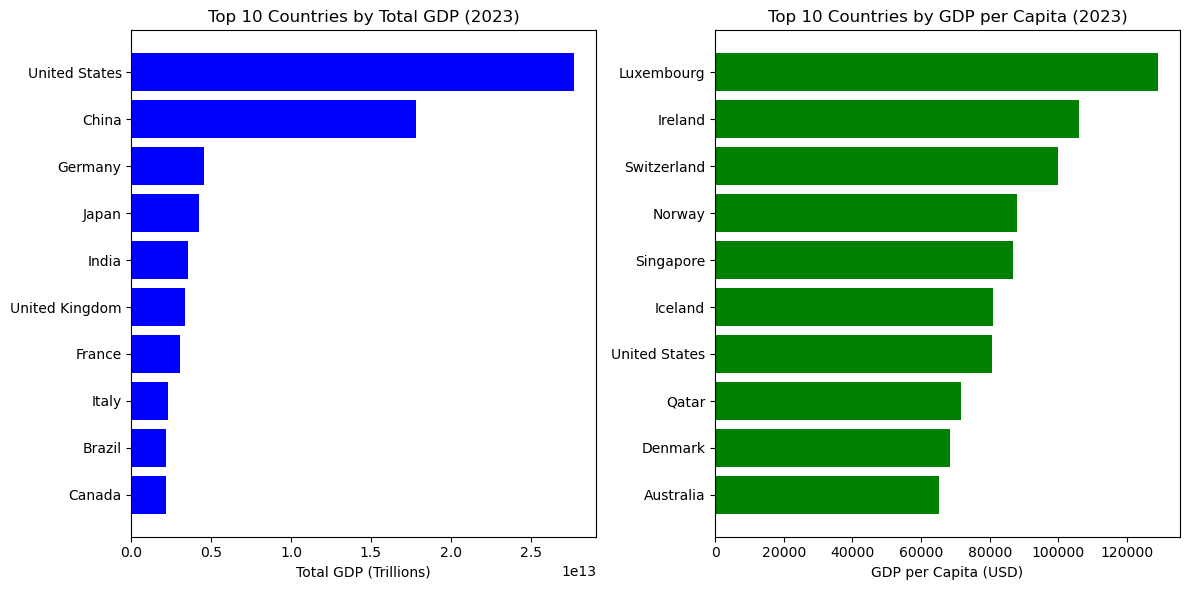

In [47]:
top10_gdp_countries = df_top10_gdp["Country"]
top10_gdp_per_capita_countries = df_top10_gdp_per_capita["Country"]


fig, ax = plt.subplots(1, 2, figsize=(12,6))


ax[0].barh(top10_gdp_countries[::-1], df_top10_gdp["GDP 2023"][::-1], color="blue")
ax[0].set_title("Top 10 Countries by Total GDP (2023)")
ax[0].set_xlabel("Total GDP (Trillions)")


ax[1].barh(top10_gdp_per_capita_countries[::-1], df_top10_gdp_per_capita["GDP per capita"][::-1], color="green")
ax[1].set_title("Top 10 Countries by GDP per Capita (2023)")
ax[1].set_xlabel("GDP per Capita (USD)")

plt.tight_layout()
plt.show()

In [ ]:
#Bottom ten countries 

In [27]:
df_bottom10 = df.sort_values(by="GDP 2023", ascending=False).tail(10)
print(df_bottom10.loc[:, ["Country", "GDP 2023"]])

                      Country      GDP 2023
171  St. Vincent & Grenadines  1.065963e+09
172       Saint Kitts & Nevis  1.055500e+09
173                     Samoa  9.381894e+08
174       Sao Tome & Principe  6.789763e+08
175                  Dominica  6.539926e+08
176                Micronesia  4.600000e+08
177                     Palau  2.818491e+08
178                  Kiribati  2.792089e+08
179          Marshall Islands  2.593000e+08
180                    Tuvalu  6.228031e+07


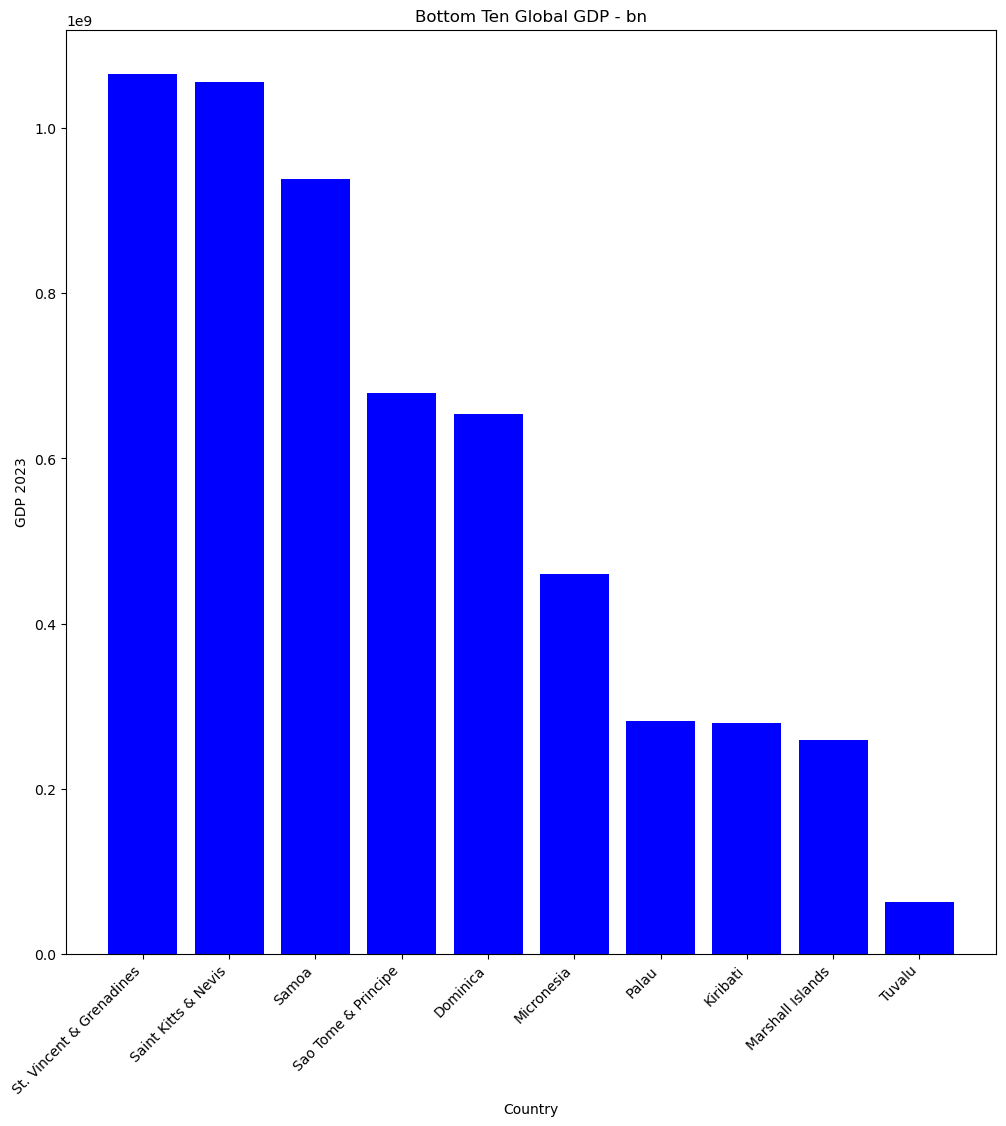

In [37]:
df_bottom10 = df.sort_values(by="GDP 2023", ascending=False).tail(10)
plt.figure(figsize=(12,12))
plt.bar(df_bottom10['Country'], df_bottom10['GDP 2023'], color='blue')
plt.xlabel('Country')
plt.ylabel('GDP 2023')
plt.title('Bottom Ten Global GDP - bn')
plt.xticks(rotation=45, ha="right") # Rotates & aligns text properly
plt.show()

In [49]:
df_bottom10_gdp = df.sort_values(by="GDP 2023", ascending=True).head(10)
df_bottom10_gdp_per_capita = df.sort_values(by="GDP per capita", ascending=True).head(10)

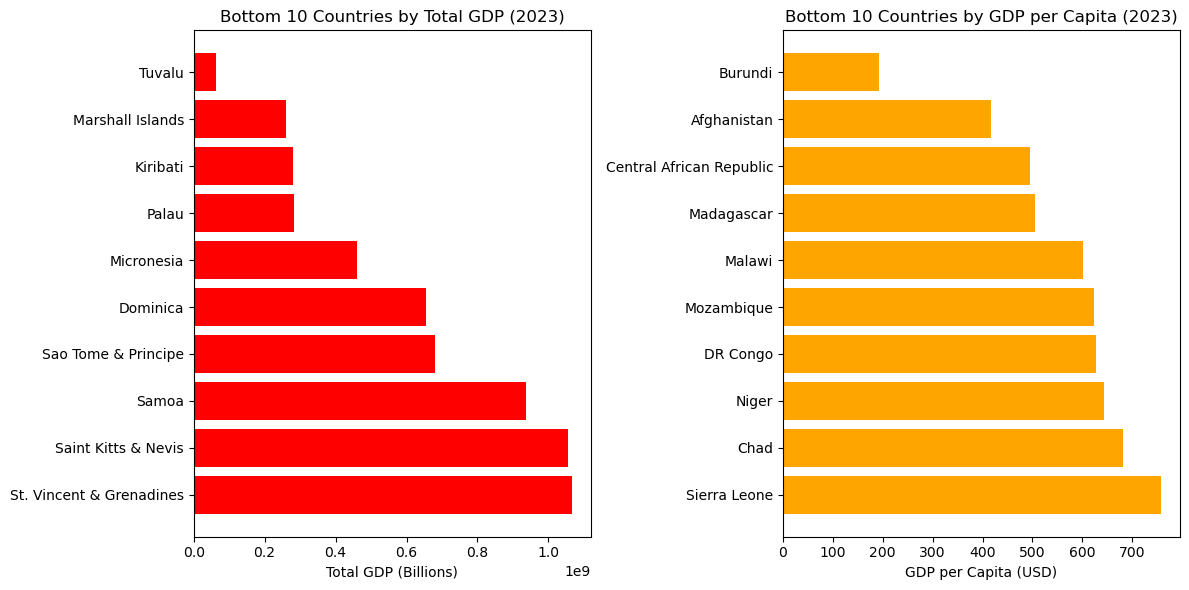

In [51]:
bottom10_gdp_countries = df_bottom10_gdp["Country"]
bottom10_gdp_per_capita_countries = df_bottom10_gdp_per_capita["Country"]

fig, ax = plt.subplots(1, 2, figsize=(12,6))


ax[0].barh(bottom10_gdp_countries[::-1], df_bottom10_gdp["GDP 2023"][::-1], color="red")
ax[0].set_title("Bottom 10 Countries by Total GDP (2023)")
ax[0].set_xlabel("Total GDP (Billions)")


ax[1].barh(bottom10_gdp_per_capita_countries[::-1], df_bottom10_gdp_per_capita["GDP per capita"][::-1], color="orange")
ax[1].set_title("Bottom 10 Countries by GDP per Capita (2023)")
ax[1].set_xlabel("GDP per Capita (USD)")

plt.tight_layout()
plt.show()

In [ ]:
#Comps 

In [52]:
average_gdp_per_capita = df["GDP per capita"].mean()
print(f"Average GDP per Capita: ${average_gdp_per_capita:,.2f}")


Average GDP per Capita: $17,693.57


In [53]:
min_gdp_per_capita = df["GDP per capita"].min()
max_gdp_per_capita = df["GDP per capita"].max()

print(f"Minimum GDP per Capita: ${min_gdp_per_capita:,.2f}")
print(f"Maximum GDP per Capita: ${max_gdp_per_capita:,.2f}")
print(f"Range of GDP per Capita: ${max_gdp_per_capita - min_gdp_per_capita:,.2f}")


Minimum GDP per Capita: $193.00
Maximum GDP per Capita: $128,936.00
Range of GDP per Capita: $128,743.00


In [91]:
df_bottom5_gdp_per_capita = df.nsmallest(5, "GDP_per_capita")  # Bottom 10
df_top5_gdp_per_capita = df.nlargest(5, "GDP_per_capita")  # Top 10


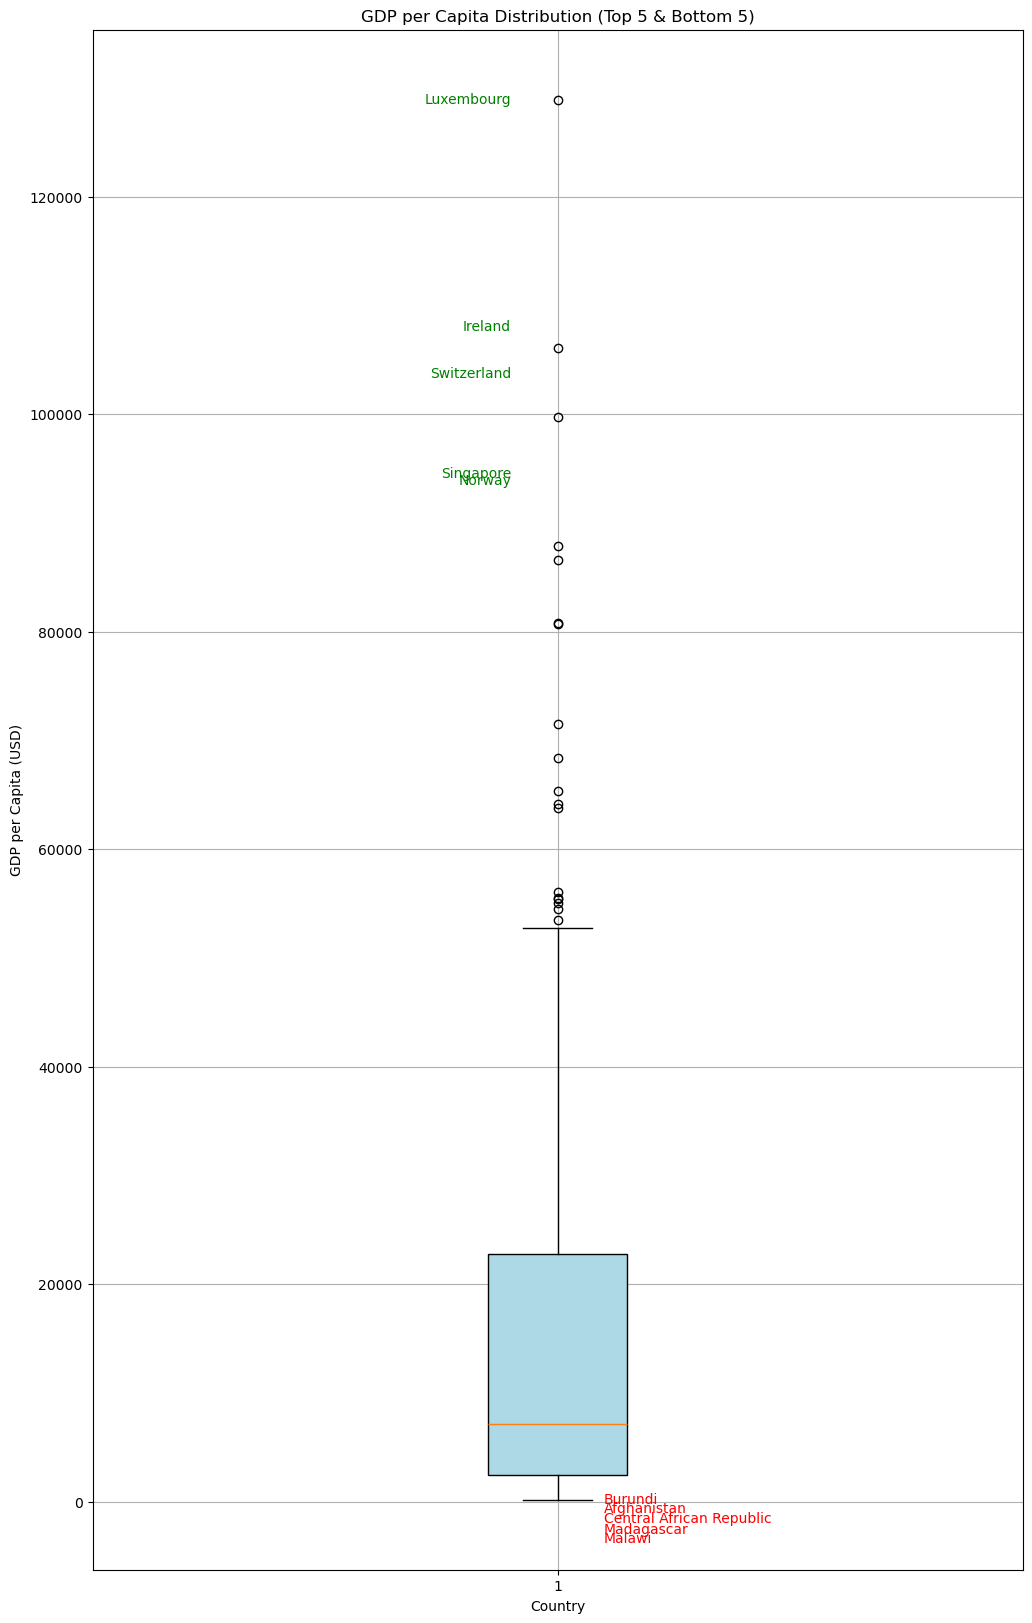

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 20))
plt.boxplot(df["GDP_per_capita"], vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))

x_pos = 1.05  
y_offset = -1000  

for i, row in enumerate(df_bottom5_gdp_per_capita.itertuples(index=False)):
    country, gdp_capita = row[1], row[6]  
    plt.text(x_pos, gdp_capita + y_offset * i, country, 
             verticalalignment="center", fontsize=10, color="red", ha="left")

x_pos_top = 0.95 
y_offset_top = 2000 

for i, row in enumerate(df_top5_gdp_per_capita.itertuples(index=False)):
    country, gdp_capita = row[1], row[6]  
    plt.text(x_pos_top, gdp_capita + y_offset_top * i, country, 
             verticalalignment="center", fontsize=10, color="green", ha="right")

plt.title("GDP per Capita Distribution (Top 5 & Bottom 5)")
plt.xlabel('Country')
plt.ylabel("GDP per Capita (USD)")
plt.grid(True)

plt.show()
